In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


References:: 

- Computer Vision: Algorithms and Applications, 2nd ed. (final draft, Sept. 2021)

- https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html

- https://www.cs.cmu.edu/~16385/s18/lectures/lecture7.pdf

- https://theailearner.com/tag/cv2-getperspectivetransform/




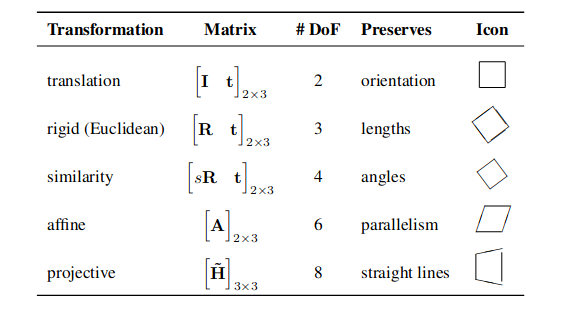


#### Scaling: 

- It is resizing the original size of the image into different size using different imterpolation methods.

- Preferable interpolation methods are:  

    a. For shrinking the image: cv.INTER_AREA
    
    b. For Zooming the image:  cv.INTER_LINEAR, cv.INTER_CUBIC(slow)

In [5]:
img = cv2.imread('/rocket.jpg')

 
res = cv2.resize(img,None,fx=2.5, fy=2.5, interpolation = cv2.INTER_CUBIC)
 
#OR
 
# height, width = img.shape[:2]
# res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

cv2.imshow('iii',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Translation:

- It is the shifting of an object location.

In [11]:
img= cv2.imread('rocket.jpg', -1)
print(img.shape)
rows, cols, cdim= img.shape

(427, 640, 3)


In [15]:
M= np.float32([[1, 0, 100], [0, 1, 50]])
dst= cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('warped image', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
## ROTATION::

M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('rotated image', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
print(M)

[[ 6.123234e-17  1.000000e+00  1.065000e+02]
 [-1.000000e+00  6.123234e-17  5.325000e+02]]


#### Affine Transformation:

- In affine transformation, all parallel lines in the original image will still be parallel in the output image.

- To find the transformation matrix, we need 3 points from the input image and their corresponding locations in the output image. Then the cv.getAffineTransform will create 2*3 matrix which is used to transform the original image

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

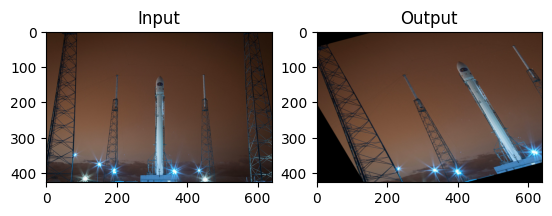

In [19]:

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv2.getAffineTransform(pts1,pts2)
 
dst = cv2.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

#### Perspective Transform:

- For doing this transformation , we need 3*3 transformation matrix. 

- Perspective transform preserves the geometry of straight lines.

- For this transformation, we need 4 point on the input image, and corresponding points on the output image and among the 4 points 3 of them should be collinear. Then the transformation matrix can be found by the function cv.getPerspectiveTransform

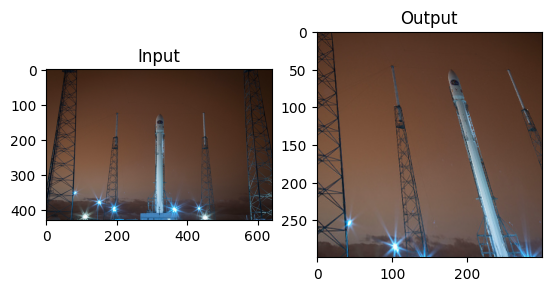

In [25]:

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[190,0],[0,300],[300,300]])
 
# here M is the transformation matrix
M = cv2.getPerspectiveTransform(pts1,pts2)
 
dst = cv2.warpPerspective(img,M,(300,300))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [26]:
M

array([[ 6.12025274e-01,  5.32195890e-02, -3.77326886e+01],
       [ 2.71856366e-02,  6.52455279e-01, -4.39319888e+01],
       [ 1.15251692e-04, -7.89308461e-04,  1.00000000e+00]])